In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statannot
from scipy import stats

## Read Data

In [4]:
# Global variables
demo_war_df = pd.read_csv('demo_war_table.csv')
war_df = pd.read_csv('war_table.csv')
subjective_df = pd.read_csv('subjective_table.csv')
objective_df = pd.read_csv('objective_task_table.csv')

## Color Palette

In [7]:
colors = ['plum','violet','royalblue','lightblue','aquamarine','seagreen','mediumseagreen','lightgreen',
          'gold','wheat','coral','salmon','tomato','hotpink']

colors_warbar = ['#a3c4f3','#8eecf5','#a5ffd6','#fff3b0','#fbc4ab']

mental_color = {'purple':['#8c07dd','#B333E9','#CB5DF1','#DC93F6','#EABFFA'],
                'blue':['#0d47a1','#1976d2','#2196f3','#90caf9','#e3f2fd'],
                'turquoise':['#008083','#39a2ae','#44e5e7','#73fbd3','#c2ffee'],
                'green':['#3DA35D','#96E072'],
                'yellow':['#F9DC5C','#FCEFB4'],
                'orange':['#f3722c','#f79d65','#f9c74f'],
                'red':['#EF3C2D','#F26A4F','#eaa8a8'],
                'pink':['#FF4D6D','#FF8FA3','#ffe5ec']}

# Correlation Matrix of Mental Health features and ANT (computerized task) features

In [10]:
def corr_significant(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for measure_one in df.columns:
        for measure_two in df.drop(measure_one,axis=1).columns:
            _ , p = pearsonr(df[measure_one],df[measure_two])
            p_matrix[df.columns.to_list().index(measure_one),df.columns.to_list().index(measure_two)] = p
    return p_matrix


def plot_cor_matrix(corr, mask):
    sns.set_style("whitegrid", {'axes.grid' : False})
    fig, ax = plt.subplots(figsize=(8, 7))
    #fig.tight_layout(pad=4)
    plt.subplots_adjust(left=0.25, bottom=0.25, right=0.9, top=0.9, wspace=0, hspace=0)
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='viridis', linewidths=0.5, linecolor='grey', cbar_kws={'orientation': 'vertical'})
    #ax.set_xticklabels(fontsize=10)
    sns.set(font_scale=0.9)


/var/folders/wk/jg2bxmbj4h18w0rtwyjc8dvr0000gn/T/ipykernel_47259/3535241642.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_measures.dropna(inplace=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:262: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


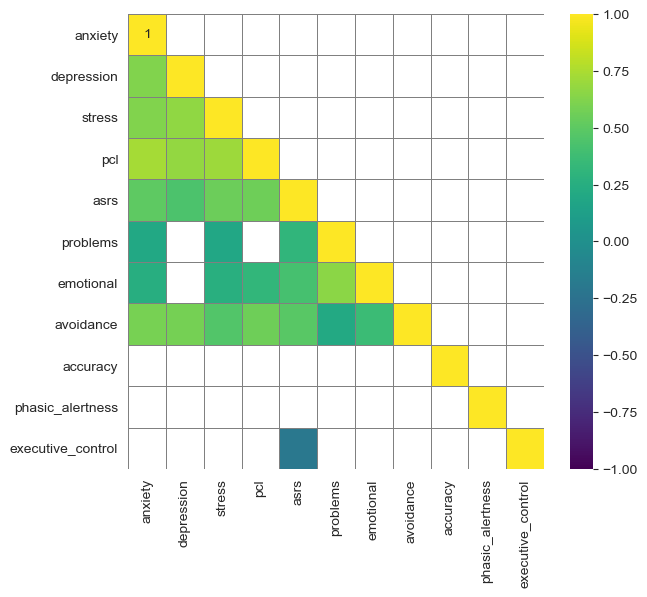

In [12]:
merged_data = pd.merge(objective_df,subjective_df,on='uniqueID')
measures = ['anxiety', 'depression', 'stress','pcl','asrs', 'problems', 'emotional', 'avoidance','accuracy',
            'phasic_alertness','executive_control']
merged_data_measures = merged_data[measures]
merged_data_measures.dropna(inplace=True)
corr=merged_data_measures.corr()
p_mat=corr_significant(merged_data_measures)

# Multiple Comparisons, FDR (= false discovery control) checking the p-values we get 
fdr_p_mat = stats.false_discovery_control(p_mat)

mask = np.invert(np.tril(fdr_p_mat<0.05)) # mask - only get significant corr
plot_cor_matrix(corr,mask)  


In [14]:
merged_data['executive_control'][130]
len(merged_data)
merged_data_copy = merged_data.copy()
merged_data = merged_data.dropna()
len(merged_data)

135

Text(0.5, 1.0, 'Correlation of Executive Control and ASRS\n r = -0.20, p = 0.02')

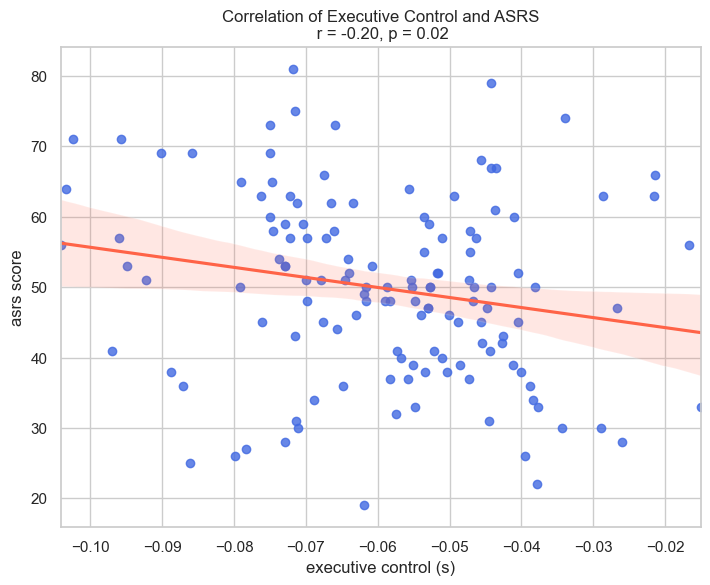

In [16]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(figsize=(8,6))
#fig.tight_layout(pad=4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.5)
r, p = pearsonr(merged_data['executive_control'], merged_data['asrs'])
sns.regplot(data=merged_data, x=merged_data['executive_control'], y=merged_data['asrs'], ax=axs,scatter=True,
           scatter_kws={"color": "royalblue"}, line_kws={"color": "tomato"})
axs.set_xlabel('executive control (s)')
axs.set_ylabel('asrs score')
axs.set_title(f'Correlation of Executive Control and ASRS\n r = {r:.2f}, p = {p:.2f}')


Text(0.5, 1.0, 'correlation of mean RT and asrs\n r = 0.19, p = 0.03')

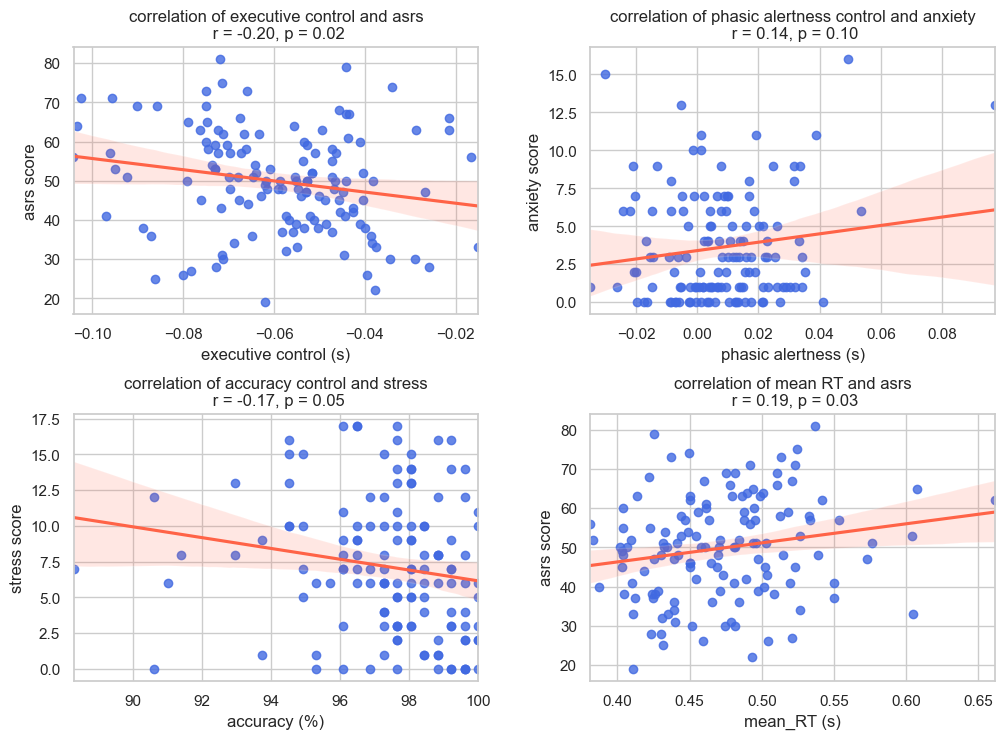

In [18]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2,2,figsize=(11,8))
fig.tight_layout(pad=4)

r, p = pearsonr(merged_data['executive_control'], merged_data['asrs'])
sns.regplot(data=merged_data, x=merged_data['executive_control'], y=merged_data['asrs'], ax=axs[0,0],scatter=True,
           scatter_kws={"color": "royalblue"}, line_kws={"color": "tomato"})
axs[0,0].set_xlabel('executive control (s)')
axs[0,0].set_ylabel('asrs score')
axs[0,0].set_title(f'correlation of executive control and asrs\n r = {r:.2f}, p = {p:.2f}')

r, p = pearsonr(merged_data['phasic_alertness'], merged_data['anxiety'])
sns.regplot(data=merged_data, x=merged_data['phasic_alertness'], y=merged_data['anxiety'], ax=axs[0,1],scatter=True,
           scatter_kws={"color": "royalblue"}, line_kws={"color": "tomato"})
axs[0,1].set_xlabel('phasic alertness (s)')
axs[0,1].set_ylabel('anxiety score')
axs[0,1].set_title(f'correlation of phasic alertness control and anxiety\n r = {r:.2f}, p = {p:.2f}')

r, p = pearsonr(merged_data['accuracy'], merged_data['stress'])
sns.regplot(data=merged_data, x=merged_data['accuracy'], y=merged_data['stress'], ax=axs[1,0],scatter=True,
           scatter_kws={"color": "royalblue"}, line_kws={"color": "tomato"})
axs[1,0].set_xlabel('accuracy (%)')
axs[1,0].set_ylabel('stress score')
axs[1,0].set_title(f'correlation of accuracy control and stress\n r = {r:.2f}, p = {p:.2f}')

r, p = pearsonr(merged_data['mean_RT'], merged_data['asrs'])
sns.regplot(data=merged_data, x=merged_data['mean_RT'], y=merged_data['asrs'], ax=axs[1,1],scatter=True,
           scatter_kws={"color": "royalblue"}, line_kws={"color": "tomato"})
axs[1,1].set_xlabel('mean_RT (s)')
axs[1,1].set_ylabel('asrs score')
axs[1,1].set_title(f'correlation of mean RT and asrs\n r = {r:.2f}, p = {p:.2f}')

# Mental Health features as function of War features

In [21]:
merged_mental_war = pd.merge(subjective_df, war_df, on='uniqueID')
merged_mental_war_copy = merged_mental_war.copy()
merged_mental_war = merged_mental_war.drop(['Unnamed: 0_x','Unnamed: 0_y','work_relate2war','live_in_your_place','knows_hostages'], axis=1)


In [23]:
siren_ops = ['Not at all', 'Few', 'Between 2-3 times a week', 'Every day']
reserve_ops = ['No', 'Yes, I finished my reserve', 'Yes, I still serve']
news_ops = ['Not at all', 'Two hours max', 'Between 2 to 3 hours', 'At least 5 hours']
work_ops = ['Not at all', 'Slightly', 'Moderately', 'A lot','Extremely']
victims_ops = ['No', 'Yes']
worry_ops = ['No', 'Yes']


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes, I finished my reserve: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.080e-02 U_stat=1.606e+03
Yes, I finished my reserve v.s. Yes, I still serve: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.655e-01 U_stat=3.725e+02
No v.s. Yes, I still serve: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.506e-01 U_stat=1.211e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes, I finished my reserve: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.581e-01 U_stat=1.436e+03
Yes, I finished my reserve v.s. Yes, I still serve: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000

(array([0., 1., 2., 3., 4., 5.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5')])

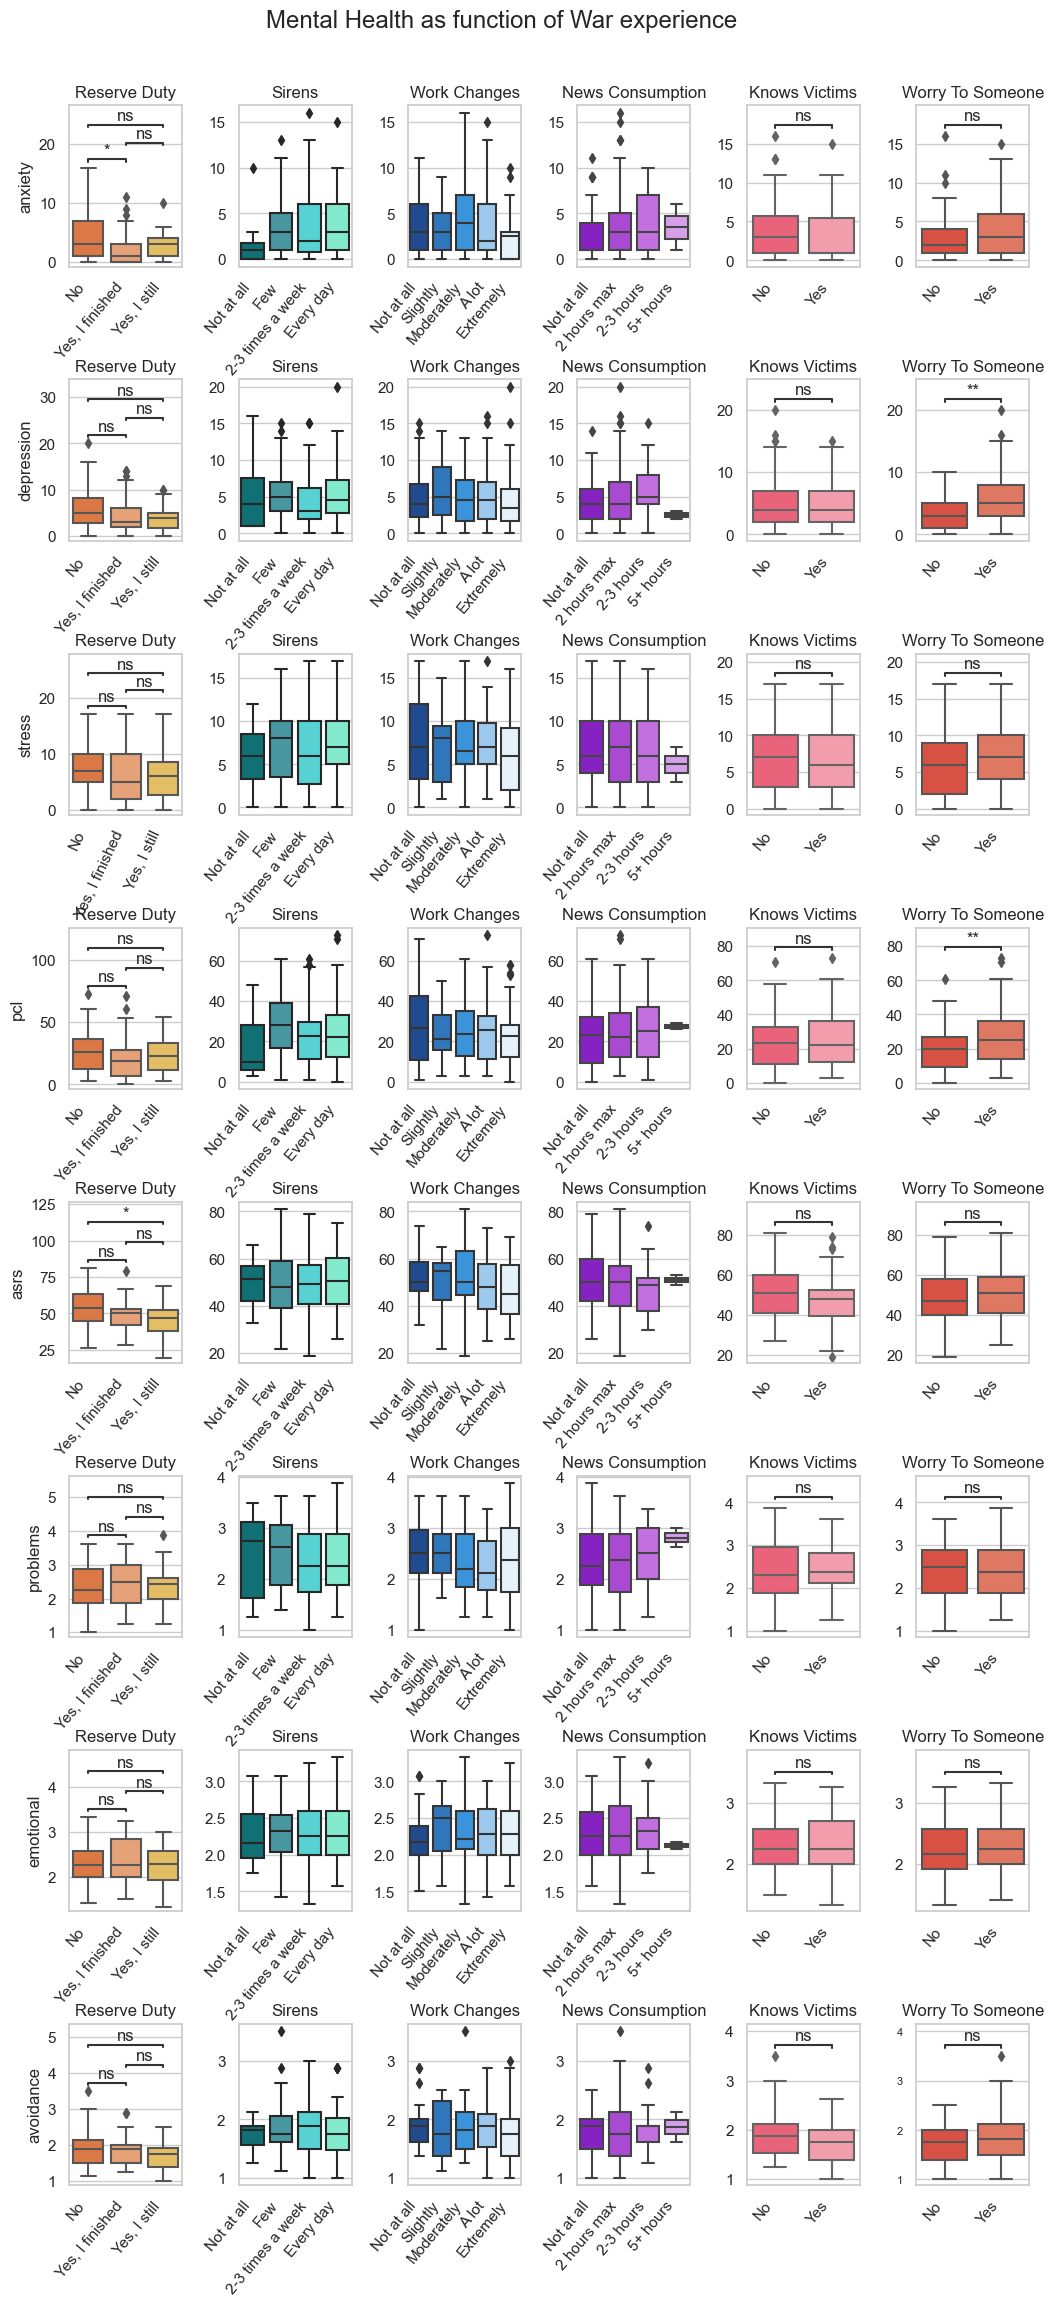

In [25]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(8,6,figsize=(12,26))
fig.tight_layout(pad=1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.7)
fig.text(0.46,0.93,'Mental Health as function of War experience', ha='center', fontsize='x-large')


# reserve has NaN values 
reserve_dass = merged_mental_war[['anxiety','depression','stress','pcl','asrs','problems','emotional','avoidance','reserve_duty']]
reserve_dass = reserve_dass.dropna()

mapping = {op: i for i, op in enumerate(reserve_ops)}
key = reserve_dass['reserve_duty'].map(mapping)
reserve_dass = reserve_dass.iloc[key.argsort()]

xlabels_reserve = ['No', 'Yes, I finished', 'Yes, I still']

sns.boxplot(x=reserve_dass['reserve_duty'],y=reserve_dass['anxiety'],ax=axs[0,0],palette=mental_color['orange'])
axs[0,0].set_xticklabels(xlabels_reserve,rotation=50, ha='right')
axs[0,0].set_xlabel('')
axs[0,0].set_title('Reserve Duty')

sns.boxplot(x=reserve_dass['reserve_duty'],y=reserve_dass['depression'],ax=axs[1,0],palette=mental_color['orange'])
axs[1,0].set_xticklabels(xlabels_reserve,rotation=50, ha='right')
axs[1,0].set_xlabel('')
axs[1,0].set_title('Reserve Duty')

sns.boxplot(x=reserve_dass['reserve_duty'],y=reserve_dass['stress'],ax=axs[2,0],palette=mental_color['orange'])
axs[2,0].set_xticklabels(xlabels_reserve,rotation=65, ha='right')
axs[2,0].set_xlabel('')
axs[2,0].set_title('Reserve Duty')

sns.boxplot(x=reserve_dass['reserve_duty'],y=reserve_dass['pcl'],ax=axs[3,0],palette=mental_color['orange'])
axs[3,0].set_xticklabels(xlabels_reserve,rotation=50, ha='right')
axs[3,0].set_xlabel('')
axs[3,0].set_title('Reserve Duty')

sns.boxplot(x=reserve_dass['reserve_duty'],y=reserve_dass['asrs'],ax=axs[4,0],palette=mental_color['orange'])
axs[4,0].set_xticklabels(xlabels_reserve,rotation=50, ha='right')
axs[4,0].set_xlabel('')
axs[4,0].set_title('Reserve Duty')

sns.boxplot(x=reserve_dass['reserve_duty'],y=reserve_dass['problems'],ax=axs[5,0],palette=mental_color['orange'])
axs[5,0].set_xticklabels(xlabels_reserve,rotation=50, ha='right')
axs[5,0].set_xlabel('')
axs[5,0].set_title('Reserve Duty')

sns.boxplot(x=reserve_dass['reserve_duty'],y=reserve_dass['emotional'],ax=axs[6,0],palette=mental_color['orange'])
axs[6,0].set_xticklabels(xlabels_reserve,rotation=50, ha='right')
axs[6,0].set_xlabel('')
axs[6,0].set_title('Reserve Duty')

sns.boxplot(x=reserve_dass['reserve_duty'],y=reserve_dass['avoidance'],ax=axs[7,0],palette=mental_color['orange'])
axs[7,0].set_xticklabels(xlabels_reserve,rotation=50, ha='right')
axs[7,0].set_xlabel('')
axs[7,0].set_title('Reserve Duty')


# adding the significant differrnces between goroups
test_sign = "Mann-Whitney" # t-test_ind
statannot.add_stat_annotation(axs[0,0],data=reserve_dass, x='reserve_duty', y='anxiety',
                              order=reserve_dass['reserve_duty'].unique(),
                                  box_pairs=[('No','Yes, I finished my reserve'),
                                             ('No','Yes, I still serve'),
                                             ('Yes, I still serve','Yes, I finished my reserve')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[1,0],data=reserve_dass, x='reserve_duty', y='depression',
                              order=reserve_dass['reserve_duty'].unique(),
                                  box_pairs=[('No','Yes, I finished my reserve'),
                                             ('No','Yes, I still serve'),
                                             ('Yes, I still serve','Yes, I finished my reserve')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[2,0],data=reserve_dass, x='reserve_duty', y='stress',
                              order=reserve_dass['reserve_duty'].unique(),
                                  box_pairs=[('No','Yes, I finished my reserve'), 
                                             ('No','Yes, I still serve'),
                                             ('Yes, I still serve','Yes, I finished my reserve')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[3,0],data=reserve_dass, x='reserve_duty', y='pcl',
                              order=reserve_dass['reserve_duty'].unique(),
                                  box_pairs=[('No','Yes, I finished my reserve'), 
                                             ('No','Yes, I still serve'),
                                             ('Yes, I still serve','Yes, I finished my reserve')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[4,0],data=reserve_dass, x='reserve_duty', y='asrs',
                              order=reserve_dass['reserve_duty'].unique(),
                                  box_pairs=[('No','Yes, I finished my reserve'),
                                             ('No','Yes, I still serve'),
                                             ('Yes, I still serve','Yes, I finished my reserve')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[5,0],data=reserve_dass, x='reserve_duty', y='problems',
                              order=reserve_dass['reserve_duty'].unique(),
                                  box_pairs=[('No','Yes, I finished my reserve'),
                                             ('No','Yes, I still serve'),
                                             ('Yes, I still serve','Yes, I finished my reserve')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[6,0],data=reserve_dass, x='reserve_duty', y='emotional',
                              order=reserve_dass['reserve_duty'].unique(),
                                  box_pairs=[('No','Yes, I finished my reserve'), 
                                             ('No','Yes, I still serve'),
                                             ('Yes, I still serve','Yes, I finished my reserve')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[7,0],data=reserve_dass, x='reserve_duty', y='avoidance',
                              order=reserve_dass['reserve_duty'].unique(),
                                  box_pairs=[('No','Yes, I finished my reserve'), 
                                             ('No','Yes, I still serve'),
                                             ('Yes, I still serve','Yes, I finished my reserve')],
                                 test=test_sign,text_format="star",loc="inside")




# siren
mapping = {op: i for i, op in enumerate(siren_ops)}
key = merged_mental_war['sirens'].map(mapping)
merged_mental_war = merged_mental_war.iloc[key.argsort()]

xlabels_siren = ['Not at all', 'Few', '2-3 times a week', 'Every day']

sns.boxplot(x=merged_mental_war['sirens'],y=merged_mental_war['anxiety'],ax=axs[0,1],palette=mental_color['turquoise'])
axs[0,1].set_xticklabels(xlabels_siren,rotation=50, ha='right')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')
axs[0,1].set_title('Sirens')


sns.boxplot(x=merged_mental_war['sirens'],y=merged_mental_war['depression'],ax=axs[1,1],palette=mental_color['turquoise'])
axs[1,1].set_xticklabels(xlabels_siren,rotation=50, ha='right')
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('')
axs[1,1].set_title('Sirens')


sns.boxplot(x=merged_mental_war['sirens'],y=merged_mental_war['stress'],ax=axs[2,1],palette=mental_color['turquoise'])
axs[2,1].set_xticklabels(xlabels_siren,rotation=50, ha='right')
axs[2,1].set_xlabel('')
axs[2,1].set_ylabel('')
axs[2,1].set_title('Sirens')


sns.boxplot(x=merged_mental_war['sirens'],y=merged_mental_war['pcl'],ax=axs[3,1],palette=mental_color['turquoise'])
axs[3,1].set_xticklabels(xlabels_siren,rotation=50, ha='right')
axs[3,1].set_xlabel('')
axs[3,1].set_ylabel('')
axs[3,1].set_title('Sirens')


sns.boxplot(x=merged_mental_war['sirens'],y=merged_mental_war['asrs'],ax=axs[4,1],palette=mental_color['turquoise'])
axs[4,1].set_xticklabels(xlabels_siren,rotation=50, ha='right')
axs[4,1].set_xlabel('')
axs[4,1].set_ylabel('')
axs[4,1].set_title('Sirens')


sns.boxplot(x=merged_mental_war['sirens'],y=merged_mental_war['problems'],ax=axs[5,1],palette=mental_color['turquoise'])
axs[5,1].set_xticklabels(xlabels_siren,rotation=50, ha='right')
axs[5,1].set_xlabel('')
axs[5,1].set_ylabel('')
axs[5,1].set_title('Sirens')


sns.boxplot(x=merged_mental_war['sirens'],y=merged_mental_war['emotional'],ax=axs[6,1],palette=mental_color['turquoise'])
axs[6,1].set_xticklabels(xlabels_siren,rotation=50, ha='right')
axs[6,1].set_xlabel('')
axs[6,1].set_ylabel('')
axs[6,1].set_title('Sirens')


sns.boxplot(x=merged_mental_war['sirens'],y=merged_mental_war['avoidance'],ax=axs[7,1],palette=mental_color['turquoise'])
axs[7,1].set_xticklabels(xlabels_siren,rotation=50, ha='right')
axs[7,1].set_xlabel('')
axs[7,1].set_ylabel('')
axs[7,1].set_title('Sirens')
'''
# adding the significant differrnces between goroups
test_sign = "Mann-Whitney" # t-test_ind
statannot.add_stat_annotation(axs[0,1],data=merged_mental_war, x='sirens', y='anxiety',
                              order=merged_mental_war['sirens'].unique(),
                                  box_pairs=[('Not at all','Few'),
                                             ('Not at all','Between 2-3 times a week'),
                                             ('Not at all','Every day'),
                                             ('Few','Between 2-3 times a week'),
                                             ('Few','Every day'),
                                             ('Between 2-3 times a week','Every day')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[1,1],data=merged_mental_war, x='sirens', y='depression',
                              order=merged_mental_war['sirens'].unique(),
                                  box_pairs=[('Not at all','Few'),
                                             ('Not at all','Between 2-3 times a week'),
                                             ('Not at all','Every day'),
                                             ('Few','Between 2-3 times a week'),
                                             ('Few','Every day'),
                                             ('Between 2-3 times a week','Every day')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[2,1],data=merged_mental_war, x='sirens', y='stress',
                              order=merged_mental_war['sirens'].unique(),
                                  box_pairs=[('Not at all','Few'),
                                             ('Not at all','Between 2-3 times a week'),
                                             ('Not at all','Every day'),
                                             ('Few','Between 2-3 times a week'),
                                             ('Few','Every day'),
                                             ('Between 2-3 times a week','Every day')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[3,1],data=merged_mental_war, x='sirens', y='pcl',
                              order=merged_mental_war['sirens'].unique(),
                                  box_pairs=[('Not at all','Few'),
                                             ('Not at all','Between 2-3 times a week'),
                                             ('Not at all','Every day'),
                                             ('Few','Between 2-3 times a week'),
                                             ('Few','Every day'),
                                             ('Between 2-3 times a week','Every day')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[4,1],data=merged_mental_war, x='sirens', y='asrs',
                              order=merged_mental_war['sirens'].unique(),
                                  box_pairs=[('Not at all','Few'),
                                             ('Not at all','Between 2-3 times a week'),
                                             ('Not at all','Every day'),
                                             ('Few','Between 2-3 times a week'),
                                             ('Few','Every day'),
                                             ('Between 2-3 times a week','Every day')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[5,1],data=merged_mental_war, x='sirens', y='problems',
                              order=merged_mental_war['sirens'].unique(),
                                  box_pairs=[('Not at all','Few'),
                                             ('Not at all','Between 2-3 times a week'),
                                             ('Not at all','Every day'),
                                             ('Few','Between 2-3 times a week'),
                                             ('Few','Every day'),
                                             ('Between 2-3 times a week','Every day')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[6,1],data=merged_mental_war, x='sirens', y='emotional',
                              order=merged_mental_war['sirens'].unique(),
                                  box_pairs=[('Not at all','Few'),
                                             ('Not at all','Between 2-3 times a week'),
                                             ('Not at all','Every day'),
                                             ('Few','Between 2-3 times a week'),
                                             ('Few','Every day'),
                                             ('Between 2-3 times a week','Every day')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[7,1],data=merged_mental_war, x='sirens', y='avoidance',
                              order=merged_mental_war['sirens'].unique(),
                                  box_pairs=[('Not at all','Few'),
                                             ('Not at all','Between 2-3 times a week'),
                                             ('Not at all','Every day'),
                                             ('Few','Between 2-3 times a week'),
                                             ('Few','Every day'),
                                             ('Between 2-3 times a week','Every day')],
                                 test=test_sign,text_format="star",loc="inside")

'''

# work changes
work_dass = merged_mental_war[['anxiety','depression','stress','pcl','asrs','problems','emotional','avoidance','work_changes']]
work_dass = work_dass.dropna()

mapping = {op: i for i, op in enumerate(work_ops)}
key = work_dass['work_changes'].map(mapping)
work_dass = work_dass.iloc[key.argsort()]

xlabels_work = ['Not at all', 'Slightly', 'Moderately', 'A lot','Extremely']

sns.boxplot(x=work_dass['work_changes'],y=work_dass['anxiety'],ax=axs[0,2],palette=mental_color['blue'])
axs[0,2].set_xticklabels(xlabels_work,rotation=50, ha='right')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')
axs[0,2].set_title('Work Changes')


sns.boxplot(x=work_dass['work_changes'],y=work_dass['depression'],ax=axs[1,2],palette=mental_color['blue'])
axs[1,2].set_xticklabels(xlabels_work,rotation=50, ha='right')
axs[1,2].set_xlabel('')
axs[1,2].set_ylabel('')
axs[1,2].set_title('Work Changes')

sns.boxplot(x=work_dass['work_changes'],y=work_dass['stress'],ax=axs[2,2],palette=mental_color['blue'])
axs[2,2].set_xticklabels(xlabels_work,rotation=50, ha='right')
axs[2,2].set_xlabel('')
axs[2,2].set_ylabel('')
axs[2,2].set_title('Work Changes')

sns.boxplot(x=work_dass['work_changes'],y=work_dass['pcl'],ax=axs[3,2],palette=mental_color['blue'])
axs[3,2].set_xticklabels(xlabels_work,rotation=50, ha='right')
axs[3,2].set_xlabel('')
axs[3,2].set_ylabel('')
axs[3,2].set_title('Work Changes')

sns.boxplot(x=work_dass['work_changes'],y=work_dass['asrs'],ax=axs[4,2],palette=mental_color['blue'])
axs[4,2].set_xticklabels(xlabels_work,rotation=50, ha='right')
axs[4,2].set_xlabel('')
axs[4,2].set_ylabel('')
axs[4,2].set_title('Work Changes')

sns.boxplot(x=work_dass['work_changes'],y=work_dass['problems'],ax=axs[5,2],palette=mental_color['blue'])
axs[5,2].set_xticklabels(xlabels_work,rotation=50, ha='right')
axs[5,2].set_xlabel('')
axs[5,2].set_ylabel('')
axs[5,2].set_title('Work Changes')

sns.boxplot(x=work_dass['work_changes'],y=work_dass['emotional'],ax=axs[6,2],palette=mental_color['blue'])
axs[6,2].set_xticklabels(xlabels_work,rotation=50, ha='right')
axs[6,2].set_xlabel('')
axs[6,2].set_ylabel('')
axs[6,2].set_title('Work Changes')

sns.boxplot(x=work_dass['work_changes'],y=work_dass['avoidance'],ax=axs[7,2],palette=mental_color['blue'])
axs[7,2].set_xticklabels(xlabels_work,rotation=50, ha='right')
axs[7,2].set_xlabel('')
axs[7,2].set_ylabel('')
axs[7,2].set_title('Work Changes')
'''
work_ops = ['Not at all', 'Slightly', 'Moderately', 'A lot','Extremely']
# adding the significant differrnces between goroups
test_sign = "Mann-Whitney" # t-test_ind
statannot.add_stat_annotation(axs[0,2],data=work_dass, x='work_changes', y='anxiety',
                              order=work_dass['work_changes'].unique(),
                                  box_pairs=[('Not at all','Slightly'),
                                             ('Not at all','Moderately'),
                                             ('Not at all','A lot'),
                                             ('Not at all','Extremely'),
                                             ('Slightly','Moderately'),
                                             ('Slightly','A lot'),
                                             ('Slightly','Extremely'),
                                             ('Moderately','A lot'),
                                             ('Moderately','Extremely'),
                                             ('A lot','Extremely')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[1,2],data=work_dass, x='work_changes', y='depression',
                              order=work_dass['work_changes'].unique(),
                                  box_pairs=[('Not at all','Slightly'),
                                             ('Not at all','Moderately'),
                                             ('Not at all','A lot'),
                                             ('Not at all','Extremely'),
                                             ('Slightly','Moderately'),
                                             ('Slightly','A lot'),
                                             ('Slightly','Extremely'),
                                             ('Moderately','A lot'),
                                             ('Moderately','Extremely'),
                                             ('A lot','Extremely')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[2,2],data=work_dass, x='work_changes', y='stress',
                              order=work_dass['work_changes'].unique(),
                                  box_pairs=[('Not at all','Slightly'),
                                             ('Not at all','Moderately'),
                                             ('Not at all','A lot'),
                                             ('Not at all','Extremely'),
                                             ('Slightly','Moderately'),
                                             ('Slightly','A lot'),
                                             ('Slightly','Extremely'),
                                             ('Moderately','A lot'),
                                             ('Moderately','Extremely'),
                                             ('A lot','Extremely')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[3,2],data=work_dass, x='work_changes', y='pcl',
                              order=work_dass['work_changes'].unique(),
                                  box_pairs=[('Not at all','Slightly'),
                                             ('Not at all','Moderately'),
                                             ('Not at all','A lot'),
                                             ('Not at all','Extremely'),
                                             ('Slightly','Moderately'),
                                             ('Slightly','A lot'),
                                             ('Slightly','Extremely'),
                                             ('Moderately','A lot'),
                                             ('Moderately','Extremely'),
                                             ('A lot','Extremely')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[4,2],data=work_dass, x='work_changes', y='asrs',
                              order=work_dass['work_changes'].unique(),
                                  box_pairs=[('Not at all','Slightly'),
                                             ('Not at all','Moderately'),
                                             ('Not at all','A lot'),
                                             ('Not at all','Extremely'),
                                             ('Slightly','Moderately'),
                                             ('Slightly','A lot'),
                                             ('Slightly','Extremely'),
                                             ('Moderately','A lot'),
                                             ('Moderately','Extremely'),
                                             ('A lot','Extremely')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[5,2],data=work_dass, x='work_changes', y='problems',
                              order=work_dass['work_changes'].unique(),
                                  box_pairs=[('Not at all','Slightly'),
                                             ('Not at all','Moderately'),
                                             ('Not at all','A lot'),
                                             ('Not at all','Extremely'),
                                             ('Slightly','Moderately'),
                                             ('Slightly','A lot'),
                                             ('Slightly','Extremely'),
                                             ('Moderately','A lot'),
                                             ('Moderately','Extremely'),
                                             ('A lot','Extremely')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[6,2],data=work_dass, x='work_changes', y='emotional',
                              order=work_dass['work_changes'].unique(),
                                  box_pairs=[('Not at all','Slightly'),
                                             ('Not at all','Moderately'),
                                             ('Not at all','A lot'),
                                             ('Not at all','Extremely'),
                                             ('Slightly','Moderately'),
                                             ('Slightly','A lot'),
                                             ('Slightly','Extremely'),
                                             ('Moderately','A lot'),
                                             ('Moderately','Extremely'),
                                             ('A lot','Extremely')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[7,2],data=work_dass, x='work_changes', y='avoidance',
                              order=work_dass['work_changes'].unique(),
                                  box_pairs=[('Not at all','Slightly'),
                                             ('Not at all','Moderately'),
                                             ('Not at all','A lot'),
                                             ('Not at all','Extremely'),
                                             ('Slightly','Moderately'),
                                             ('Slightly','A lot'),
                                             ('Slightly','Extremely'),
                                             ('Moderately','A lot'),
                                             ('Moderately','Extremely'),
                                             ('A lot','Extremely')],
                                 test=test_sign,text_format="star",loc="inside")

'''

# news
mapping = {op: i for i, op in enumerate(news_ops)}
key = merged_mental_war['news_consumption'].map(mapping)
merged_mental_war = merged_mental_war.iloc[key.argsort()]

xlabels_news = ['Not at all', '2 hours max', '2-3 hours', '5+ hours']

sns.boxplot(x=merged_mental_war['news_consumption'],y=merged_mental_war['anxiety'],ax=axs[0,3],palette=mental_color['purple'])
axs[0,3].set_xticklabels(xlabels_news,rotation=50, ha='right')
axs[0,3].set_xlabel('')
axs[0,3].set_ylabel('')
axs[0,3].set_title('News Consumption')


sns.boxplot(x=merged_mental_war['news_consumption'],y=merged_mental_war['depression'],ax=axs[1,3],palette=mental_color['purple'])
axs[1,3].set_xticklabels(xlabels_news,rotation=50, ha='right')
axs[1,3].set_xlabel('')
axs[1,3].set_ylabel('')
axs[1,3].set_title('News Consumption')


sns.boxplot(x=merged_mental_war['news_consumption'],y=merged_mental_war['stress'],ax=axs[2,3],palette=mental_color['purple'])
axs[2,3].set_xticklabels(xlabels_news,rotation=50, ha='right')
axs[2,3].set_xlabel('')
axs[2,3].set_ylabel('')
axs[2,3].set_title('News Consumption')


sns.boxplot(x=merged_mental_war['news_consumption'],y=merged_mental_war['pcl'],ax=axs[3,3],palette=mental_color['purple'])
axs[3,3].set_xticklabels(xlabels_news,rotation=50, ha='right')
axs[3,3].set_xlabel('')
axs[3,3].set_ylabel('')
axs[3,3].set_title('News Consumption')


sns.boxplot(x=merged_mental_war['news_consumption'],y=merged_mental_war['asrs'],ax=axs[4,3],palette=mental_color['purple'])
axs[4,3].set_xticklabels(xlabels_news,rotation=50, ha='right')
axs[4,3].set_xlabel('')
axs[4,3].set_ylabel('')
axs[4,3].set_title('News Consumption')


sns.boxplot(x=merged_mental_war['news_consumption'],y=merged_mental_war['problems'],ax=axs[5,3],palette=mental_color['purple'])
axs[5,3].set_xticklabels(xlabels_news,rotation=50, ha='right')
axs[5,3].set_xlabel('')
axs[5,3].set_ylabel('')
axs[5,3].set_title('News Consumption')


sns.boxplot(x=merged_mental_war['news_consumption'],y=merged_mental_war['emotional'],ax=axs[6,3],palette=mental_color['purple'])
axs[6,3].set_xticklabels(xlabels_news,rotation=50, ha='right')
axs[6,3].set_xlabel('')
axs[6,3].set_ylabel('')
axs[6,3].set_title('News Consumption')


sns.boxplot(x=merged_mental_war['news_consumption'],y=merged_mental_war['avoidance'],ax=axs[7,3],palette=mental_color['purple'])
axs[7,3].set_xticklabels(xlabels_news,rotation=50, ha='right')
axs[7,3].set_xlabel('')
axs[7,3].set_ylabel('')
axs[7,3].set_title('News Consumption')

'''
# adding the significant differrnces between goroups
test_sign = "Mann-Whitney" # t-test_ind
statannot.add_stat_annotation(axs[0,3],data=merged_mental_war, x='news_consumption', y='anxiety',
                              order=merged_mental_war['news_consumption'].unique(),
                                  box_pairs=[('Not at all','Two hours max'),
                                             ('Not at all','Between 2 to 3 hours'),
                                             ('Not at all','At least 5 hours'),
                                             ('Two hours max','Between 2 to 3 hours'),
                                             ('Two hours max','At least 5 hours'),
                                             ('Between 2 to 3 hours','At least 5 hours')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[1,3],data=merged_mental_war, x='news_consumption', y='depression',
                              order=merged_mental_war['news_consumption'].unique(),
                                  box_pairs=[('Not at all','Two hours max'),
                                             ('Not at all','Between 2 to 3 hours'),
                                             ('Not at all','At least 5 hours'),
                                             ('Two hours max','Between 2 to 3 hours'),
                                             ('Two hours max','At least 5 hours'),
                                             ('Between 2 to 3 hours','At least 5 hours')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[2,3],data=merged_mental_war, x='news_consumption', y='stress',
                              order=merged_mental_war['news_consumption'].unique(),
                                  box_pairs=[('Not at all','Two hours max'),
                                             ('Not at all','Between 2 to 3 hours'),
                                             ('Not at all','At least 5 hours'),
                                             ('Two hours max','Between 2 to 3 hours'),
                                             ('Two hours max','At least 5 hours'),
                                             ('Between 2 to 3 hours','At least 5 hours')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[3,3],data=merged_mental_war, x='news_consumption', y='pcl',
                              order=merged_mental_war['news_consumption'].unique(),
                                  box_pairs=[('Not at all','Two hours max'),
                                             ('Not at all','Between 2 to 3 hours'),
                                             ('Not at all','At least 5 hours'),
                                             ('Two hours max','Between 2 to 3 hours'),
                                             ('Two hours max','At least 5 hours'),
                                             ('Between 2 to 3 hours','At least 5 hours')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[4,3],data=merged_mental_war, x='news_consumption', y='asrs',
                              order=merged_mental_war['news_consumption'].unique(),
                                  box_pairs=[('Not at all','Two hours max'),
                                             ('Not at all','Between 2 to 3 hours'),
                                             ('Not at all','At least 5 hours'),
                                             ('Two hours max','Between 2 to 3 hours'),
                                             ('Two hours max','At least 5 hours'),
                                             ('Between 2 to 3 hours','At least 5 hours')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[5,3],data=merged_mental_war, x='news_consumption', y='problems',
                              order=merged_mental_war['news_consumption'].unique(),
                                  box_pairs=[('Not at all','Two hours max'),
                                             ('Not at all','Between 2 to 3 hours'),
                                             ('Not at all','At least 5 hours'),
                                             ('Two hours max','Between 2 to 3 hours'),
                                             ('Two hours max','At least 5 hours'),
                                             ('Between 2 to 3 hours','At least 5 hours')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[6,3],data=merged_mental_war, x='news_consumption', y='emotional',
                              order=merged_mental_war['news_consumption'].unique(),
                                  box_pairs=[('Not at all','Two hours max'),
                                             ('Not at all','Between 2 to 3 hours'),
                                             ('Not at all','At least 5 hours'),
                                             ('Two hours max','Between 2 to 3 hours'),
                                             ('Two hours max','At least 5 hours'),
                                             ('Between 2 to 3 hours','At least 5 hours')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[7,3],data=merged_mental_war, x='news_consumption', y='avoidance',
                              order=merged_mental_war['news_consumption'].unique(),
                                  box_pairs=[('Not at all','Two hours max'),
                                             ('Not at all','Between 2 to 3 hours'),
                                             ('Not at all','At least 5 hours'),
                                             ('Two hours max','Between 2 to 3 hours'),
                                             ('Two hours max','At least 5 hours'),
                                             ('Between 2 to 3 hours','At least 5 hours')],
                                 test=test_sign,text_format="star",loc="inside")
'''

# victims

mapping = {op: i for i, op in enumerate(victims_ops)}
key = merged_mental_war['knows_victims'].map(mapping)
merged_mental_war = merged_mental_war.iloc[key.argsort()]


xlabels_vict = ['No','Yes']

sns.boxplot(x=merged_mental_war['knows_victims'],y=merged_mental_war['anxiety'],ax=axs[0,4],palette=mental_color['pink'])
axs[0,4].set_xticklabels(xlabels_vict,rotation=50, ha='right')
axs[0,4].set_xlabel('')
axs[0,4].set_ylabel('')
axs[0,4].set_title('Knows Victims')


sns.boxplot(x=merged_mental_war['knows_victims'],y=merged_mental_war['depression'],ax=axs[1,4],palette=mental_color['pink'])
axs[1,4].set_xticklabels(xlabels_vict,rotation=50, ha='right')
axs[1,4].set_xlabel('')
axs[1,4].set_ylabel('')
axs[1,4].set_title('Knows Victims')

sns.boxplot(x=merged_mental_war['knows_victims'],y=merged_mental_war['stress'],ax=axs[2,4],palette=mental_color['pink'])
axs[2,4].set_xticklabels(xlabels_vict,rotation=50, ha='right')
axs[2,4].set_xlabel('')
axs[2,4].set_ylabel('')
axs[2,4].set_title('Knows Victims')

sns.boxplot(x=merged_mental_war['knows_victims'],y=merged_mental_war['pcl'],ax=axs[3,4],palette=mental_color['pink'])
axs[3,4].set_xticklabels(xlabels_vict,rotation=50, ha='right')
axs[3,4].set_xlabel('')
axs[3,4].set_ylabel('')
axs[3,4].set_title('Knows Victims')

sns.boxplot(x=merged_mental_war['knows_victims'],y=merged_mental_war['asrs'],ax=axs[4,4],palette=mental_color['pink'])
axs[4,4].set_xticklabels(xlabels_vict,rotation=50, ha='right')
axs[4,4].set_xlabel('')
axs[4,4].set_ylabel('')
axs[4,4].set_title('Knows Victims')

sns.boxplot(x=merged_mental_war['knows_victims'],y=merged_mental_war['problems'],ax=axs[5,4],palette=mental_color['pink'])
axs[5,4].set_xticklabels(xlabels_vict,rotation=50, ha='right')
axs[5,4].set_xlabel('')
axs[5,4].set_ylabel('')
axs[5,4].set_title('Knows Victims')

sns.boxplot(x=merged_mental_war['knows_victims'],y=merged_mental_war['emotional'],ax=axs[6,4],palette=mental_color['pink'])
axs[6,4].set_xticklabels(xlabels_vict,rotation=50, ha='right')
axs[6,4].set_xlabel('')
axs[6,4].set_ylabel('')
axs[6,4].set_title('Knows Victims')

sns.boxplot(x=merged_mental_war['knows_victims'],y=merged_mental_war['avoidance'],ax=axs[7,4],palette=mental_color['pink'])
axs[7,4].set_xticklabels(xlabels_vict,rotation=50, ha='right')
axs[7,4].set_xlabel('')
axs[7,4].set_ylabel('')
axs[7,4].set_title('Knows Victims')


# adding the significant differrnces between goroups
test_sign = "Mann-Whitney" # t-test_ind
statannot.add_stat_annotation(axs[0,4],data=merged_mental_war, x='knows_victims', y='anxiety',
                              order=merged_mental_war['knows_victims'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[1,4],data=merged_mental_war, x='knows_victims', y='depression',
                              order=merged_mental_war['knows_victims'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[2,4],data=merged_mental_war, x='knows_victims', y='stress',
                              order=merged_mental_war['knows_victims'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[3,4],data=merged_mental_war, x='knows_victims', y='pcl',
                              order=merged_mental_war['knows_victims'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[4,4],data=merged_mental_war, x='knows_victims', y='asrs',
                              order=merged_mental_war['knows_victims'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[5,4],data=merged_mental_war, x='knows_victims', y='problems',
                              order=merged_mental_war['knows_victims'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[6,4],data=merged_mental_war, x='knows_victims', y='emotional',
                              order=merged_mental_war['knows_victims'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[7,4],data=merged_mental_war, x='knows_victims', y='avoidance',
                              order=merged_mental_war['knows_victims'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")

# worry

mapping = {op: i for i, op in enumerate(worry_ops)}
key = merged_mental_war['worry_to_someone'].map(mapping)
merged_mental_war = merged_mental_war.iloc[key.argsort()]

xlabels_worry = ['No','Yes']

sns.boxplot(x=merged_mental_war['worry_to_someone'],y=merged_mental_war['anxiety'],ax=axs[0,5],palette=mental_color['red'])
axs[0,5].set_xticklabels(xlabels_worry,rotation=50, ha='right')
axs[0,5].set_xlabel('')
axs[0,5].set_ylabel('')
axs[0,5].set_title('Worry To Someone')


sns.boxplot(x=merged_mental_war['worry_to_someone'],y=merged_mental_war['depression'],ax=axs[1,5],palette=mental_color['red'])
axs[1,5].set_xticklabels(xlabels_worry,rotation=50, ha='right')
axs[1,5].set_xlabel('')
axs[1,5].set_ylabel('')
axs[1,5].set_title('Worry To Someone')

sns.boxplot(x=merged_mental_war['worry_to_someone'],y=merged_mental_war['stress'],ax=axs[2,5],palette=mental_color['red'])
axs[2,5].set_xticklabels(xlabels_worry,rotation=50, ha='right')
axs[2,5].set_xlabel('')
axs[2,5].set_ylabel('')
axs[2,5].set_title('Worry To Someone')

sns.boxplot(x=merged_mental_war['worry_to_someone'],y=merged_mental_war['pcl'],ax=axs[3,5],palette=mental_color['red'])
axs[3,5].set_xticklabels(xlabels_worry,rotation=50, ha='right')
axs[3,5].set_xlabel('')
axs[3,5].set_ylabel('')
axs[3,5].set_title('Worry To Someone')

sns.boxplot(x=merged_mental_war['worry_to_someone'],y=merged_mental_war['asrs'],ax=axs[4,5],palette=mental_color['red'])
axs[4,5].set_xticklabels(xlabels_worry,rotation=50, ha='right')
axs[4,5].set_xlabel('')
axs[4,5].set_ylabel('')
axs[4,5].set_title('Worry To Someone')

sns.boxplot(x=merged_mental_war['worry_to_someone'],y=merged_mental_war['problems'],ax=axs[5,5],palette=mental_color['red'])
axs[5,5].set_xticklabels(xlabels_worry,rotation=50, ha='right')
axs[5,5].set_xlabel('')
axs[5,5].set_ylabel('')
axs[5,5].set_title('Worry To Someone')

sns.boxplot(x=merged_mental_war['worry_to_someone'],y=merged_mental_war['emotional'],ax=axs[6,5],palette=mental_color['red'])
axs[6,5].set_xticklabels(xlabels_worry,rotation=50, ha='right')
axs[6,5].set_xlabel('')
axs[6,5].set_ylabel('')
axs[6,5].set_title('Worry To Someone')

sns.boxplot(x=merged_mental_war['worry_to_someone'],y=merged_mental_war['avoidance'],ax=axs[7,5],palette=mental_color['red'])
axs[7,5].set_xticklabels(xlabels_worry,rotation=50, ha='right')
axs[7,5].set_xlabel('')
axs[7,5].set_ylabel('')
axs[7,5].set_title('Worry To Someone')

# adding the significant differrnces between goroups
test_sign = "Mann-Whitney" # t-test_ind
statannot.add_stat_annotation(axs[0,5],data=merged_mental_war, x='worry_to_someone', y='anxiety',
                              order=merged_mental_war['worry_to_someone'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[1,5],data=merged_mental_war, x='worry_to_someone', y='depression',
                              order=merged_mental_war['worry_to_someone'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[2,5],data=merged_mental_war, x='worry_to_someone', y='stress',
                              order=merged_mental_war['worry_to_someone'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[3,5],data=merged_mental_war, x='worry_to_someone', y='pcl',
                              order=merged_mental_war['worry_to_someone'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[4,5],data=merged_mental_war, x='worry_to_someone', y='asrs',
                              order=merged_mental_war['worry_to_someone'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[5,5],data=merged_mental_war, x='worry_to_someone', y='problems',
                              order=merged_mental_war['worry_to_someone'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[6,5],data=merged_mental_war, x='worry_to_someone', y='emotional',
                              order=merged_mental_war['worry_to_someone'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[7,5],data=merged_mental_war, x='worry_to_someone', y='avoidance',
                              order=merged_mental_war['worry_to_someone'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")


plt.yticks(fontsize=8)


# ANT features as function of War features

In [28]:
objective_df_copy = objective_df.copy()
flanker_df = objective_df_copy[['uniqueID','mean_RT','accuracy','phasic_alertness','executive_control']]
merged_flanker_war = pd.merge(flanker_df, war_df, on='uniqueID')
merged_flanker_war_copy = merged_flanker_war.copy()
merged_flanker_war = merged_flanker_war.drop(['Unnamed: 0','work_relate2war','live_in_your_place','knows_hostages'], axis=1)
merged_flanker_war_copy = merged_flanker_war.copy()
merged_flanker_war = merged_flanker_war.dropna()


In [32]:
def flanker_significant_diff_calc(df, war_name, flanker_measure):
    war_groups = df[war_name].unique()
    dict_groups = {}
    significant_combinations = []
    for group in war_groups: # seperate to different lists according to war categories and added to a dictionary
        temp_group = df.loc[df[war_name]==group]
        dict_groups[group] = temp_group[flanker_measure]
    i = 1
    for group1 in war_groups[:-1]:
        for group2 in war_groups[i:]:
            U, p = stats.mannwhitneyu(dict_groups[group1], dict_groups[group2], alternative='two-sided')
            if p < 0.05:
                significant_combinations.append([(group1,group2), p])
        i = i+1

    return significant_combinations

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes, I finished my reserve: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.288e-03 U_stat=1.436e+03
Yes, I finished my reserve v.s. Yes, I still serve: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.030e+02
No v.s. Yes, I still serve: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.712e-03 U_stat=1.265e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Yes, I finished my reserve: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.741e-01 U_stat=7.505e+02
Yes, I finished my reserve v.s. Yes, I still serve: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000

(<Axes: title={'center': 'Worry To Someone'}>,
 [<statannot.StatResult.StatResult at 0x16b440150>])

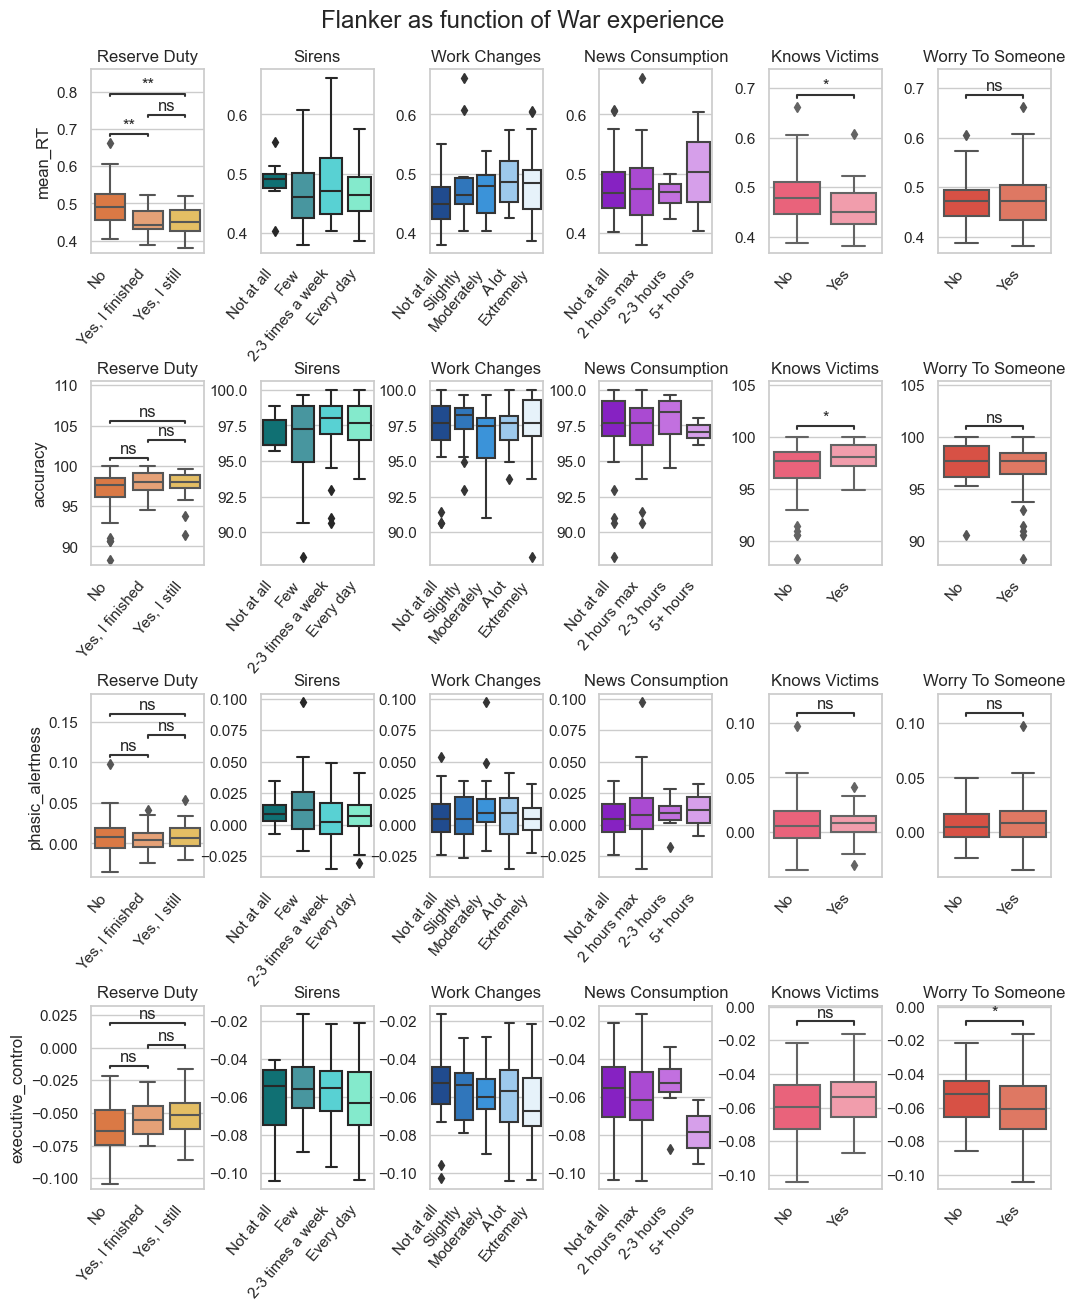

In [34]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(4,6,figsize=(12,14))
#fig.tight_layout(pad=1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.7)
fig.text(0.46,0.93,'Flanker as function of War experience', ha='center', fontsize='x-large')

# reserve duty
reserve_flanker = merged_flanker_war[['mean_RT','accuracy','phasic_alertness','executive_control','reserve_duty']]
reserve_flanker = reserve_flanker.dropna()

mapping = {op: i for i, op in enumerate(reserve_ops)}
key = reserve_flanker['reserve_duty'].map(mapping)
reserve_flanker = reserve_flanker.iloc[key.argsort()]

ax1 = sns.boxplot(x=reserve_flanker['reserve_duty'],y=reserve_flanker['mean_RT'],ax=axs[0,0],palette=mental_color['orange'])
axs[0,0].set_xticklabels(xlabels_reserve,rotation=50, ha='right')
axs[0,0].set_xlabel('')
axs[0,0].set_title('Reserve Duty')

sns.boxplot(x=reserve_flanker['reserve_duty'],y=reserve_flanker['accuracy'],ax=axs[1,0],palette=mental_color['orange'])
axs[1,0].set_xticklabels(xlabels_reserve,rotation=50, ha='right')
axs[1,0].set_xlabel('')
axs[1,0].set_title('Reserve Duty')

sns.boxplot(x=reserve_flanker['reserve_duty'],y=reserve_flanker['phasic_alertness'],ax=axs[2,0],palette=mental_color['orange'])
axs[2,0].set_xticklabels(xlabels_reserve,rotation=50, ha='right')
axs[2,0].set_xlabel('')
axs[2,0].set_title('Reserve Duty')

sns.boxplot(x=reserve_flanker['reserve_duty'],y=reserve_flanker['executive_control'],ax=axs[3,0],palette=mental_color['orange'])
axs[3,0].set_xticklabels(xlabels_reserve,rotation=50, ha='right')
axs[3,0].set_xlabel('')
axs[3,0].set_title('Reserve Duty')

# adding the significant differrnces between goroups
test_sign = "Mann-Whitney" # t-test_ind
statannot.add_stat_annotation(axs[0,0],data=reserve_flanker, x='reserve_duty', y='mean_RT',order=reserve_flanker['reserve_duty'].unique(),
                                  box_pairs=[('No','Yes, I finished my reserve'), ('No','Yes, I still serve'),('Yes, I still serve','Yes, I finished my reserve')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[1,0],data=reserve_flanker, x='reserve_duty', y='accuracy',order=reserve_flanker['reserve_duty'].unique(),
                                  box_pairs=[('No','Yes, I finished my reserve'), ('No','Yes, I still serve'),('Yes, I still serve','Yes, I finished my reserve')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[2,0],data=reserve_flanker, x='reserve_duty', y='phasic_alertness',order=reserve_flanker['reserve_duty'].unique(),
                                  box_pairs=[('No','Yes, I finished my reserve'), ('No','Yes, I still serve'),('Yes, I still serve','Yes, I finished my reserve')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[3,0],data=reserve_flanker, x='reserve_duty', y='executive_control',order=reserve_flanker['reserve_duty'].unique(),
                                  box_pairs=[('No','Yes, I finished my reserve'), ('No','Yes, I still serve'),('Yes, I still serve','Yes, I finished my reserve')],
                                 test=test_sign,text_format="star",loc="inside")


# siren
mapping = {op: i for i, op in enumerate(siren_ops)}
key = merged_flanker_war['sirens'].map(mapping)
merged_flanker_war = merged_flanker_war.iloc[key.argsort()]

sns.boxplot(x=merged_flanker_war['sirens'],y=merged_flanker_war['mean_RT'],ax=axs[0,1],palette=mental_color['turquoise'])
axs[0,1].set_xticklabels(xlabels_siren,rotation=50, ha='right')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')
axs[0,1].set_title('Sirens')

sns.boxplot(x=merged_flanker_war['sirens'],y=merged_flanker_war['accuracy'],ax=axs[1,1],palette=mental_color['turquoise'])
axs[1,1].set_xticklabels(xlabels_siren,rotation=50, ha='right')
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('')
axs[1,1].set_title('Sirens')

sns.boxplot(x=merged_flanker_war['sirens'],y=merged_flanker_war['phasic_alertness'],ax=axs[2,1],palette=mental_color['turquoise'])
axs[2,1].set_xticklabels(xlabels_siren,rotation=50, ha='right')
axs[2,1].set_xlabel('')
axs[2,1].set_ylabel('')
axs[2,1].set_title('Sirens')

sns.boxplot(x=merged_flanker_war['sirens'],y=merged_flanker_war['executive_control'],ax=axs[3,1],palette=mental_color['turquoise'])
axs[3,1].set_xticklabels(xlabels_siren,rotation=50, ha='right')
axs[3,1].set_xlabel('')
axs[3,1].set_ylabel('')
axs[3,1].set_title('Sirens')

# adding the significant differrnces between goroups
'''
statannot.add_stat_annotation(axs[0,1],data=merged_flanker_war, x='sirens', y='mean_RT',order=merged_flanker_war['sirens'].unique(),
                                  box_pairs=[('Not at all','Few'), 
                                             ('Not at all','Between 2-3 times a week'),
                                             ('Not at all', 'Every day'),
                                             ('Few','Between 2-3 times a week'),
                                             ('Few','Every day'),
                                             ('Between 2-3 times a week','Every day')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[1,1],data=merged_flanker_war, x='sirens', y='accuracy',order=merged_flanker_war['sirens'].unique(),
                                  box_pairs=[('Not at all','Few'), 
                                             ('Not at all','Between 2-3 times a week'),
                                             ('Not at all', 'Every day'),
                                             ('Few','Between 2-3 times a week'),
                                             ('Few','Every day'),
                                             ('Between 2-3 times a week','Every day')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[2,1],data=merged_flanker_war, x='sirens', y='phasic_alertness',order=merged_flanker_war['sirens'].unique(),
                                  box_pairs=[('Not at all','Few'), 
                                             ('Not at all','Between 2-3 times a week'),
                                             ('Not at all', 'Every day'),
                                             ('Few','Between 2-3 times a week'),
                                             ('Few','Every day'),
                                             ('Between 2-3 times a week','Every day')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[3,1],data=merged_flanker_war, x='sirens', y='executive_control',order=merged_flanker_war['sirens'].unique(),
                                  box_pairs=[('Not at all','Few'), 
                                             ('Not at all','Between 2-3 times a week'),
                                             ('Not at all', 'Every day'),
                                             ('Few','Between 2-3 times a week'),
                                             ('Few','Every day'),
                                             ('Between 2-3 times a week','Every day')],
                                 test=test_sign,text_format="star",loc="inside")

'''

# work changes
work_flanker = merged_flanker_war[['mean_RT','accuracy','phasic_alertness','executive_control','work_changes']]
work_flanker = work_flanker.dropna()

mapping = {op: i for i, op in enumerate(work_ops)}
key = work_flanker['work_changes'].map(mapping)
work_flanker = work_flanker.iloc[key.argsort()]

sns.boxplot(x=work_flanker['work_changes'],y=work_flanker['mean_RT'],ax=axs[0,2],palette=mental_color['blue'])
axs[0,2].set_xticklabels(xlabels_work,rotation=50, ha='right')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')
axs[0,2].set_title('Work Changes')

sns.boxplot(x=work_flanker['work_changes'],y=work_flanker['accuracy'],ax=axs[1,2],palette=mental_color['blue'])
axs[1,2].set_xticklabels(xlabels_work,rotation=50, ha='right')
axs[1,2].set_xlabel('')
axs[1,2].set_ylabel('')
axs[1,2].set_title('Work Changes')

sns.boxplot(x=work_flanker['work_changes'],y=work_flanker['phasic_alertness'],ax=axs[2,2],palette=mental_color['blue'])
axs[2,2].set_xticklabels(xlabels_work,rotation=50, ha='right')
axs[2,2].set_xlabel('')
axs[2,2].set_ylabel('')
axs[2,2].set_title('Work Changes')

sns.boxplot(x=work_flanker['work_changes'],y=work_flanker['executive_control'],ax=axs[3,2],palette=mental_color['blue'])
axs[3,2].set_xticklabels(xlabels_work,rotation=50, ha='right')
axs[3,2].set_xlabel('')
axs[3,2].set_ylabel('')
axs[3,2].set_title('Work Changes')


# adding the significant differrnces between goroups
'''
statannot.add_stat_annotation(axs[0,2],data=work_flanker, x='work_changes', y='mean_RT',order=work_flanker['work_changes'].unique(),
                                  box_pairs=[('Not at all','Slightly'), 
                                             ('Not at all','Moderately'),
                                             ('Not at all', 'A lot'),
                                             ('Not at all','Extremely'),
                                             ('Slightly','Moderately'),
                                             ('Slightly','A lot'),
                                             ('Slightly','Extremely'),
                                             ('Moderately','A lot'),
                                             ('Moderately','Extremely'),
                                             ('A lot','Extremely')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[1,2],data=work_flanker, x='work_changes', y='accuracy',order=work_flanker['work_changes'].unique(),
                                  box_pairs=[('Not at all','Slightly'), 
                                             ('Not at all','Moderately'),
                                             ('Not at all', 'A lot'),
                                             ('Not at all','Extremely'),
                                             ('Slightly','Moderately'),
                                             ('Slightly','A lot'),
                                             ('Slightly','Extremely'),
                                             ('Moderately','A lot'),
                                             ('Moderately','Extremely'),
                                             ('A lot','Extremely')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[2,2],data=work_flanker, x='work_changes', y='phasic_alertness',order=work_flanker['work_changes'].unique(),
                                  box_pairs=[('Not at all','Slightly'), 
                                             ('Not at all','Moderately'),
                                             ('Not at all', 'A lot'),
                                             ('Not at all','Extremely'),
                                             ('Slightly','Moderately'),
                                             ('Slightly','A lot'),
                                             ('Slightly','Extremely'),
                                             ('Moderately','A lot'),
                                             ('Moderately','Extremely'),
                                             ('A lot','Extremely')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[3,2],data=work_flanker, x='work_changes', y='executive_control',order=work_flanker['work_changes'].unique(),
                                  box_pairs=[('Not at all','Slightly'), 
                                             ('Not at all','Moderately'),
                                             ('Not at all', 'A lot'),
                                             ('Not at all','Extremely'),
                                             ('Slightly','Moderately'),
                                             ('Slightly','A lot'),
                                             ('Slightly','Extremely'),
                                             ('Moderately','A lot'),
                                             ('Moderately','Extremely'),
                                             ('A lot','Extremely')],
                                 test=test_sign,text_format="star",loc="inside")

'''


# news


mapping = {op: i for i, op in enumerate(news_ops)}
key = merged_flanker_war['news_consumption'].map(mapping)
merged_flanker_war = merged_flanker_war.iloc[key.argsort()]

sns.boxplot(x=merged_flanker_war['news_consumption'],y=merged_flanker_war['mean_RT'],ax=axs[0,3],palette=mental_color['purple'])
axs[0,3].set_xticklabels(xlabels_news,rotation=50, ha='right')
axs[0,3].set_xlabel('')
axs[0,3].set_ylabel('')
axs[0,3].set_title('News Consumption')

sns.boxplot(x=merged_flanker_war['news_consumption'],y=merged_flanker_war['accuracy'],ax=axs[1,3],palette=mental_color['purple'])
axs[1,3].set_xticklabels(xlabels_news,rotation=50, ha='right')
axs[1,3].set_xlabel('')
axs[1,3].set_ylabel('')
axs[1,3].set_title('News Consumption')

sns.boxplot(x=merged_flanker_war['news_consumption'],y=merged_flanker_war['phasic_alertness'],ax=axs[2,3],palette=mental_color['purple'])
axs[2,3].set_xticklabels(xlabels_news,rotation=50, ha='right')
axs[2,3].set_xlabel('')
axs[2,3].set_ylabel('')
axs[2,3].set_title('News Consumption')

sns.boxplot(x=merged_flanker_war['news_consumption'],y=merged_flanker_war['executive_control'],ax=axs[3,3],palette=mental_color['purple'])
axs[3,3].set_xticklabels(xlabels_news,rotation=50, ha='right')
axs[3,3].set_xlabel('')
axs[3,3].set_ylabel('')
axs[3,3].set_title('News Consumption')

# adding the significant differrnces between goroups
'''
statannot.add_stat_annotation(axs[0,3],data=merged_flanker_war, x='news_consumption', y='mean_RT',order=merged_flanker_war['news_consumption'].unique(),
                                  box_pairs=[('Not at all','Two hours max'), 
                                             ('Not at all','Between 2 to 3 hours'),
                                             ('Not at all', 'At least 5 hours'),
                                             ('Two hours max','Between 2 to 3 hours'),
                                             ('Two hours max','At least 5 hours'),
                                             ('Between 2 to 3 hours','At least 5 hours')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[1,3],data=merged_flanker_war, x='news_consumption', y='accuracy',order=merged_flanker_war['news_consumption'].unique(),
                                  box_pairs=[('Not at all','Two hours max'), 
                                             ('Not at all','Between 2 to 3 hours'),
                                             ('Not at all', 'At least 5 hours'),
                                             ('Two hours max','Between 2 to 3 hours'),
                                             ('Two hours max','At least 5 hours'),
                                             ('Between 2 to 3 hours','At least 5 hours')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[2,3],data=merged_flanker_war, x='news_consumption', y='phasic_alertness',order=merged_flanker_war['news_consumption'].unique(),
                                  box_pairs=[('Not at all','Two hours max'), 
                                             ('Not at all','Between 2 to 3 hours'),
                                             ('Not at all', 'At least 5 hours'),
                                             ('Two hours max','Between 2 to 3 hours'),
                                             ('Two hours max','At least 5 hours'),
                                             ('Between 2 to 3 hours','At least 5 hours')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[3,3],data=merged_flanker_war, x='news_consumption', y='executive_control',order=merged_flanker_war['news_consumption'].unique(),
                                  box_pairs=[('Not at all','Two hours max'), 
                                             ('Not at all','Between 2 to 3 hours'),
                                             ('Not at all', 'At least 5 hours'),
                                             ('Two hours max','Between 2 to 3 hours'),
                                             ('Two hours max','At least 5 hours'),
                                             ('Between 2 to 3 hours','At least 5 hours')],
                                 test=test_sign,text_format="star",loc="inside")



'''

# victims

mapping = {op: i for i, op in enumerate(victims_ops)}
key = merged_flanker_war['knows_victims'].map(mapping)
merged_flanker_war = merged_flanker_war.iloc[key.argsort()]

sns.boxplot(x=merged_flanker_war['knows_victims'],y=merged_flanker_war['mean_RT'],ax=axs[0,4],palette=mental_color['pink'])
axs[0,4].set_xticklabels(xlabels_vict,rotation=50, ha='right')
axs[0,4].set_xlabel('')
axs[0,4].set_ylabel('')
axs[0,4].set_title('Knows Victims')

sns.boxplot(x=merged_flanker_war['knows_victims'],y=merged_flanker_war['accuracy'],ax=axs[1,4],palette=mental_color['pink'])
axs[1,4].set_xticklabels(xlabels_vict,rotation=50, ha='right')
axs[1,4].set_xlabel('')
axs[1,4].set_ylabel('')
axs[1,4].set_title('Knows Victims')

sns.boxplot(x=merged_flanker_war['knows_victims'],y=merged_flanker_war['phasic_alertness'],ax=axs[2,4],palette=mental_color['pink'])
axs[2,4].set_xticklabels(xlabels_vict,rotation=50, ha='right')
axs[2,4].set_xlabel('')
axs[2,4].set_ylabel('')
axs[2,4].set_title('Knows Victims')

sns.boxplot(x=merged_flanker_war['knows_victims'],y=merged_flanker_war['executive_control'],ax=axs[3,4],palette=mental_color['pink'])
axs[3,4].set_xticklabels(xlabels_vict,rotation=50, ha='right')
axs[3,4].set_xlabel('')
axs[3,4].set_ylabel('')
axs[3,4].set_title('Knows Victims')


# adding the significant differrnces between goroups
statannot.add_stat_annotation(axs[0,4],data=merged_flanker_war, x='knows_victims', y='mean_RT',order=merged_flanker_war['knows_victims'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[1,4],data=merged_flanker_war, x='knows_victims', y='accuracy',order=merged_flanker_war['knows_victims'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[2,4],data=merged_flanker_war, x='knows_victims', y='phasic_alertness',order=merged_flanker_war['knows_victims'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[3,4],data=merged_flanker_war, x='knows_victims', y='executive_control',order=merged_flanker_war['knows_victims'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")


# worry

mapping = {op: i for i, op in enumerate(worry_ops)}
key = merged_flanker_war['worry_to_someone'].map(mapping)
merged_flanker_war = merged_flanker_war.iloc[key.argsort()]

sns.boxplot(x=merged_flanker_war['worry_to_someone'],y=merged_flanker_war['mean_RT'],ax=axs[0,5],palette=mental_color['red'])
axs[0,5].set_xticklabels(xlabels_worry,rotation=50, ha='right')
axs[0,5].set_xlabel('')
axs[0,5].set_ylabel('')
axs[0,5].set_title('Worry To Someone')

sns.boxplot(x=merged_flanker_war['worry_to_someone'],y=merged_flanker_war['accuracy'],ax=axs[1,5],palette=mental_color['red'])
axs[1,5].set_xticklabels(xlabels_worry,rotation=50, ha='right')
axs[1,5].set_xlabel('')
axs[1,5].set_ylabel('')
axs[1,5].set_title('Worry To Someone')

sns.boxplot(x=merged_flanker_war['worry_to_someone'],y=merged_flanker_war['phasic_alertness'],ax=axs[2,5],palette=mental_color['red'])
axs[2,5].set_xticklabels(xlabels_worry,rotation=50, ha='right')
axs[2,5].set_xlabel('')
axs[2,5].set_ylabel('')
axs[2,5].set_title('Worry To Someone')

sns.boxplot(x=merged_flanker_war['worry_to_someone'],y=merged_flanker_war['executive_control'],ax=axs[3,5],palette=mental_color['red'])
axs[3,5].set_xticklabels(xlabels_worry,rotation=50, ha='right')
axs[3,5].set_xlabel('')
axs[3,5].set_ylabel('')
axs[3,5].set_title('Worry To Someone')


# adding the significant differrnces between goroups
statannot.add_stat_annotation(axs[0,5],data=merged_flanker_war, x='worry_to_someone', y='mean_RT',order=merged_flanker_war['worry_to_someone'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[1,5],data=merged_flanker_war, x='worry_to_someone', y='accuracy',order=merged_flanker_war['worry_to_someone'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[2,5],data=merged_flanker_war, x='worry_to_someone', y='phasic_alertness',order=merged_flanker_war['worry_to_someone'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
statannot.add_stat_annotation(axs[3,5],data=merged_flanker_war, x='worry_to_someone', y='executive_control',order=merged_flanker_war['worry_to_someone'].unique(),
                                  box_pairs=[('No','Yes')],
                                 test=test_sign,text_format="star",loc="inside")
